# Task 1.1 Data Understanding
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to analyze the data

In [1]:
import math
import sys
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
pd.set_option('mode.use_inf_as_na', True)

Then we load the datasets

In [3]:
df_tweets_sample = pd.read_csv('./dataset/tweets_sample.csv', sep=',', index_col=0)  # load tweets
df_users = pd.read_csv('./dataset/users.csv', sep=',', index_col=0)  # load users

In [4]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [5]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         134464 non-null  object
 1   retweet_count   132232 non-null  object
 2   reply_count     130163 non-null  object
 3   favorite_count  130128 non-null  object
 4   num_hashtags    126020 non-null  object
 5   num_urls        130145 non-null  object
 6   num_mentions    128069 non-null  object
 7   created_at      136647 non-null  object
 8   text            131286 non-null  object
dtypes: object(9)
memory usage: 10.4+ MB


In [6]:
df_tweets_sample

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
528578456452612097,567430901,0,0,0,0,0,0,2019-11-03 16:04:59,"La sera, a letto.Lui:- FarÃ² di te la donna pi..."
492852780101406721,277506943,0,0,2,1,0,0,2019-07-28 02:03:54,#RFGoNaked http://t.co/eaf1sO4TWL
888885286917605,317296274,0,dcl83oci,NaN,NaN,NaN,NaN,2020-03-21 17:43:22,Volunteers report 100% retail tobacco complian...
516101108960206848,1372026204,0,0,0,4,1,0,2019-09-30 05:44:27,What HR Lessons Did I Learn Whilst Managing Me...
528187250392461312,468101494,0,0,0,0,0,0,2019-11-02 14:10:28,"-Cara, ti voglio POSSEDERE dove non te ti ha m..."
...,...,...,...,...,...,...,...,...,...
500184073814700033,576148031,0,0,0,0,0,0,2019-08-17 07:35:50,"Porta bene Renzi! Grazie ""presidente"""
578072909085724672,25693756,0,0,0,0,0,1,2020-03-19 05:58:16,@malakhstudios You OK?
588013533557841920,2395918790,0,0,0,0,0,0,2020-04-15 16:18:45,"If there is Jacob Whiteside, there is also Jac..."


In [7]:
#df_tweets_duplicates = df_tweets_sample[df_tweets_sample['user_id'].duplicated()]
#df_tweets_duplicates.sort_index
#from pandas import Index
#df_tweets_sample.index.duplicated()
#print(df_tweets_sample.index.get_duplicates())
df_tweets_duplicates = df_tweets_sample[df_tweets_sample.index.isin(df_tweets_sample.index[df_tweets_sample.index.duplicated()])].sort_index()
df_tweets_duplicates[df_tweets_duplicates["user_id"].isin(df_tweets_duplicates["user_id"][df_tweets_duplicates["user_id"].duplicated()])].sort_index()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
160863737924956160,223329964,0,0,0,0,1,0,2017-01-22 23:17:58,tr4nsit: Auahuahuahuahauhauahuahuahuahauh @ al...
160863737924956160,223329964,0,0,0,0,1,0,2017-01-22 23:17:58,tr4nsit: Auahuahuahuahauhauahuahuahuahauh @ al...
166680904276783104,169147207,0,0,0,0,0,1,2017-02-08 00:33:19,@Van_Thomaz precisamos de um AR CONDICIONADO ...
166680904276783104,169147207,0,0,0,0,0,1,2017-02-08 00:33:19,@Van_Thomaz precisamos de um AR CONDICIONADO ...
187245601715519490,355303911,0,0,0,0,0,1,2017-04-05 18:30:04,Jajajajaja site yama Respondele nosea mala icu...
...,...,...,...,...,...,...,...,...,...
593889571135426560,796614044,0,0,0,0,0,0,2020-05-01 21:28:02,i literally just wanted to go to sleep but the...
593889571135426560,796614044,0,0,0,0,0,0,2020-05-01 21:28:02,i literally just wanted to go to sleep but the...
63985238547775489,33621311,0,0,5,0,0,0,2016-04-30 15:17:24,A Prince and a Princess who look at prints of ...


In [8]:
df_tweets_sample['retweet_count'] = pd.to_numeric(df_tweets_sample['retweet_count'], downcast= 'float', errors='coerce') # After this instruction the column becomes numerics
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         134464 non-null  object 
 1   retweet_count   130362 non-null  float32
 2   reply_count     130163 non-null  object 
 3   favorite_count  130128 non-null  object 
 4   num_hashtags    126020 non-null  object 
 5   num_urls        130145 non-null  object 
 6   num_mentions    128069 non-null  object 
 7   created_at      136647 non-null  object 
 8   text            131286 non-null  object 
dtypes: float32(1), object(8)
memory usage: 14.9+ MB


# Datatype Casting

In [9]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


Cast name and lang columns to string and created_at to DateTime in df_users

In [10]:
df_users.name = df_users.name.astype('string')
df_users.lang = df_users.lang.astype('string')


Cast statuses_count to Int64, bot to bool and created_at to DateTime in df_users

In [13]:
df_users.statuses_count = df_users.statuses_count.astype('Int64', errors='raise')
df_users.bot = df_users.bot.astype('bool', errors='raise')
df_users.created_at = pd.to_datetime(df_users.created_at, errors='coerce')


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11507 non-null  string        
 1   lang            11508 non-null  string        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11109 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), string(2)
memory usage: 472.0 KB


Int64 casting for numeric columns in df_tweets

In [315]:
# Define max and min for Int64
max_int = np.iinfo(np.int64).max
min_int = np.iinfo(np.int64).min

for col_name in df_tweets_sample.iloc[:, : 7]:
    # Cast objects to float. after this instruction the column becomes numerics
    df_tweets_sample[col_name] = pd.to_numeric(df_tweets_sample[col_name], downcast= 'float', errors='coerce')

    # Substitute values outside of Int64 limits with NaN
    df_tweets_sample[col_name] = df_tweets_sample[col_name].apply(lambda y: y if y <= max_int or y >= min_int else pd.NA)

    # Cast to Int64
    df_tweets_sample[col_name] = df_tweets_sample[col_name].astype('Int64', errors='raise')



Cast text column to string and created_at to DateTime in df_tweets

In [316]:
df_tweets_sample.text = df_tweets_sample.text.astype('string')
df_tweets_sample.created_at = pd.to_datetime(df_tweets_sample.created_at, errors='coerce')

In [317]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136647 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   130362 non-null  Int64         
 2   reply_count     128457 non-null  Int64         
 3   favorite_count  128519 non-null  Int64         
 4   num_hashtags    124949 non-null  Int64         
 5   num_urls        128514 non-null  Int64         
 6   num_mentions    126737 non-null  Int64         
 7   created_at      136647 non-null  datetime64[ns]
 8   text            131286 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 16.3+ MB


# Manage NaN

Drop rows where created_at or user_id are NaN

In [318]:
df_tweets_sample.dropna(subset=['user_id', 'created_at'], how='any', inplace=True)

Fill the NaN in the numeric columns

In [329]:
for col_name in df_tweets_sample.iloc[:, 1 : 7]:
    median = df_tweets_sample[col_name].median().astype(np.int64)
    print('median {}:'.format(col_name), median)

    df_tweets_sample[col_name].fillna(median, inplace=True)


median retweet_count: 0
median reply_count: 0
median favorite_count: 0
median num_hashtags: 0
median num_urls: 0
median num_mentions: 0


In [330]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132272 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   132272 non-null  Int64         
 2   reply_count     132272 non-null  Int64         
 3   favorite_count  132272 non-null  Int64         
 4   num_hashtags    132272 non-null  Int64         
 5   num_urls        132272 non-null  Int64         
 6   num_mentions    132272 non-null  Int64         
 7   created_at      132272 non-null  datetime64[ns]
 8   text            128058 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.0+ MB


As statuses_count in df_users contains only tweet count and not replies, while df_tweets contains also replies, we cannot estimate NaN statuses_count with the number of the users tweets, so we fill those NaNs with median

In [15]:
median = df_users.statuses_count.median().astype(np.int64)
print(median)
df_users.statuses_count.fillna(median, inplace=True)

68


Fill NaN name in df_users  with ""

In [16]:
df_users.name.fillna("", inplace=True)

In [17]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            11508 non-null  string        
 1   lang            11508 non-null  string        
 2   bot             11508 non-null  bool          
 3   created_at      11508 non-null  datetime64[ns]
 4   statuses_count  11508 non-null  Int64         
dtypes: Int64(1), bool(1), datetime64[ns](1), string(2)
memory usage: 472.0 KB


In [321]:
print(len(df_tweets_sample[df_tweets_sample.created_at.isnull()]))
print(len(df_tweets_sample))

0
132272


In [322]:
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132272 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   132272 non-null  Int64         
 2   reply_count     132272 non-null  Int64         
 3   favorite_count  132272 non-null  Int64         
 4   num_hashtags    132272 non-null  Int64         
 5   num_urls        132272 non-null  Int64         
 6   num_mentions    132272 non-null  Int64         
 7   created_at      132272 non-null  datetime64[ns]
 8   text            128058 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.0+ MB


In [323]:
df_tweets_sample.retweet_count = df_tweets_sample.retweet_count.astype('Int64', errors='ignore') # Cast to int
df_tweets_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132272 entries, 528578456452612097 to 520574848935153664
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         132272 non-null  Int64         
 1   retweet_count   132272 non-null  Int64         
 2   reply_count     132272 non-null  Int64         
 3   favorite_count  132272 non-null  Int64         
 4   num_hashtags    132272 non-null  Int64         
 5   num_urls        132272 non-null  Int64         
 6   num_mentions    132272 non-null  Int64         
 7   created_at      132272 non-null  datetime64[ns]
 8   text            128058 non-null  string        
dtypes: Int64(7), datetime64[ns](1), string(1)
memory usage: 11.0+ MB


Remove infinite and cast them to NaN

In [324]:

df_tweets_sample['user_id'] = df_tweets_sample['user_id'].astype('Int64', errors='ignore') # Cast to int
df_tweets_sample['retweet_count'].nlargest(10)

id
440322750146555904    3349947
569644991355551745    1165422
584543298745827329     450562
581311850249265152     450529
582852316321210368     449744
582699110769131521     449637
590159207602618368     430971
587671827213848576     430580
rnh                    402398
590686978473066496     401361
Name: retweet_count, dtype: Int64

In [325]:
df_tweets_sample.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
count,1.322720e+05,1.322720e+05,132272.000000,132272.000000,1.322720e+05,132272.000000,132272.000000
mean,8.300216e+08,5.532574e+02,0.020927,1.332028,5.730682e+04,0.244383,1.414547
std,8.510603e+08,1.245368e+04,3.470514,67.848543,2.084180e+07,26.617722,255.325573
min,2.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.346384e+08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,4.680735e+08,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
75%,1.226238e+09,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000
max,3.164942e+09,3.349947e+06,902.000000,15648.000000,7.580000e+09,9592.000000,90000.000000


<AxesSubplot:ylabel='id'>

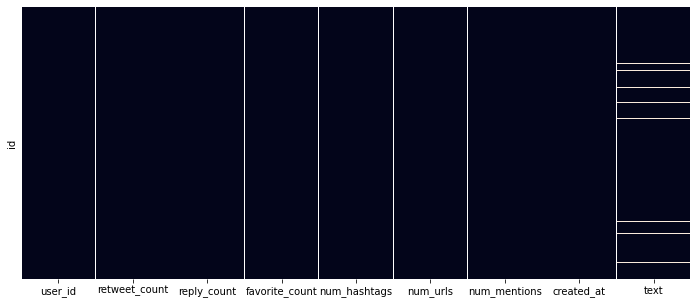

In [326]:
fig, ax = plt.subplots(figsize=(12,5)) 
sn.heatmap(df_tweets_sample.isnull(), cbar=False, xticklabels=True, ax=ax, yticklabels=False)

## Features informations:
### Users dataset
id, name, lang, bot, created_at and statuses_count
* **id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer.
* **name**
  * Type: **String**
  * Description: The name of the user.
* **lang**
  * Type: **Int32**
  * Description: The user’s language selected
* **bot**
  * Type: **Boolean**
  * Description: A binary variable that indicates if a user is a bot or a genuine user
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the user was created
* **statuses_count**
  * Type: **Int32**
  * Description: The count of the tweets made by the user at the moment of data crawling.
### Tweets dataset
* **id**
  * Type: **Object**
  * Description: Is the identifier of the single tweet, it should be int64, but we decided to consder it object because it does not affect the data if it is not an integer.
* **user_id**
  * Type: **Int64**
  * Description: Is the identifier of the single user, it will be used to join the datasets, so it is necessary that this data is a non-null integer
* **retweet_count**
  * Type: **Int32**
  * Description: The number of retweets of the single tweet
* **reply_count**
  * Type: **Int32**
  * Description: The number of replies of the single tweet
* **favorite_count**
  * Type: **Int32**
  * Description: The number of favorites (or likes) of the single tweet
* **num_hashtags**
  * Type: **Int32**
  * Description: The number of hashtags in the single tweet
* **num_urls**
  * Type: **Int32**
  * Description: The number of urls in the single tweet
* **num_mentions**
  * Type: **Int32**
  * Description: The number of mentions in the single tweet
* **created_at**
  * Type: **Datetime64**
  * Description: The timestamp of when the single tweet was created
* **text**
  * Type: **String**
  * Description: The text of the single tweet